In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd

import redapy

## Objetivo
Se analizan tres posibles análisis
- Vizualización de datos (histograma y mapa)
- Análisis de segregación espacial
- Análisis de redes

### Vizualización de datos (histograma y mapa)
Para el siguiente ejemplo del uso de Redapy, vamos a explorar las características de la población que vive en viviendas alquiladas en Lima metropolitana en el 2017
#### Distritos

In [8]:
query=redapy.query_final(tipo='Frequency',var1="poblacion.C5P2",area_break="distrito", selection="13",
                         for_query={'variables':"vivienda.C2P13",'category':"1",'logical_exp':"equal"})

df=redapy.make_query_2017(query)
df1=redapy.frequency(df, pivot=True)
df1

Scrapeo iniciado
Se cargó página REDATAM con éxito
La tabla cargó completamente
Tabla scrapeada con éxito en: 0:00:06.051020


resp,Hombre,Mujer
ubigeo,,
130101,34605,38878
130102,5579,5977
130103,1138,1272
130104,3343,3420
130105,8251,8877
...,...,...
131103,58,66
131104,165,142
131201,3281,3313


In [111]:
## Primero usamos la variable sobre la condicion de tenencia de la vivienda "C2P13"
# Explicar los parámetros que se van a usar
query=redapy.query_final(tipo='Frequency',var1="vivienda.C2P13",area_break="distrito",selection="provincia 1501")
df=redapy.make_query_2017(query)
df1=redapy.frequency(df, pivot=True)
df1.head()

Scrapeo iniciado
Se cargó página REDATAM con éxito
La tabla cargó completamente
Tabla scrapeada con éxito en: 0:00:10.057136


resp,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad
ubigeo,,,,,
150101,26985,5326,200,31809,10045
150102,1134,926,17,5111,9539
150103,38579,9859,191,56636,46421
150104,3802,549,39,5529,1034
150105,9988,1396,63,9972,2980


<AxesSubplot: xlabel='ubigeo'>

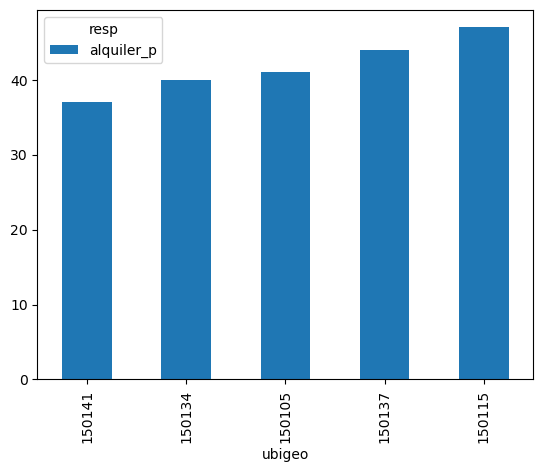

In [112]:
df1['viviendas_total']=df1.sum(axis=1)
df1['alquiler_p']=((df1.Alquilada/df1.viviendas_total)*100).round()
df1[['alquiler_p']].sort_values('alquiler_p').tail().plot(kind='bar')

#### Mapa
Para la visualización de los datos en un mapa, usaremos la libreria geopandas, la cual permite utilizar datos vectoriales. Además, usaremos los shps de distritos 2017 descargados del siguiente enlace: 

<AxesSubplot: >

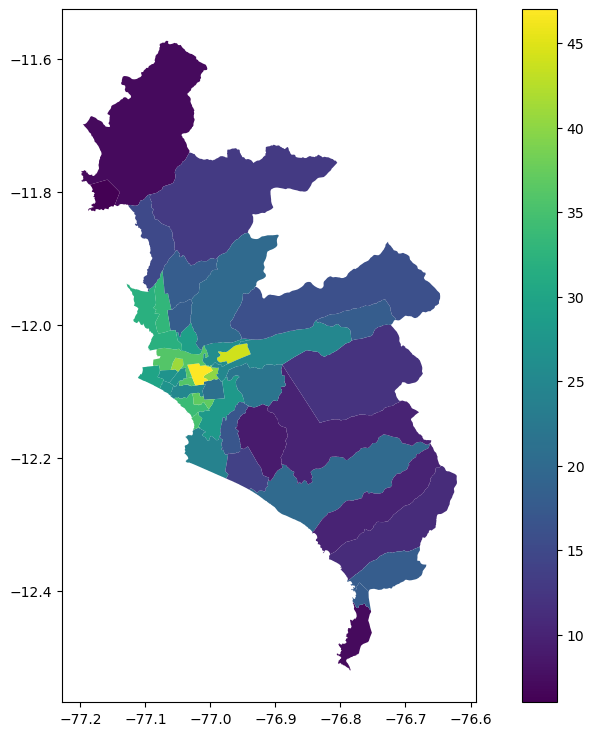

In [110]:
##
dis17=gpd.read_file('Bases originales\\Límites nacionales\\DISTRITOS.zip')
dis17=dis17.set_index('IDDIST').merge(df1, right_index=True, left_index=True, how='inner', validate='1:1')

dis17.plot(column="alquiler_p", legend=True, figsize=(12,9))

Una de las ventajas de geopandas, es que cuenta con método para generar mapas interactivos. Este método se llama "explore"

In [107]:
dis17.explore(column="alquiler_p")

In [45]:
### NBI, caracteristicas físicas de las viviendas
query=redapy.query_final(tipo='Crosstab',var1="Vivienda.C2P5", var2="Vivienda.C2P3",area_break="distrito",selection="provincia 1501")
df=redapy.make_query_2017(query,mensajes=False)

## calculamos 
df1=redapy.cross_table(df)
df1=df1.reset_index()
df1["nbi_1"]=np.where((df1.columna=="Triplay / calamina / estera"),1,0)
df1["nbi_1"]=np.where((df1.fila=="Tierra")&
                      ((df1.columna=="Quincha (caña con barro)")|
                       (df1.columna=="Piedra con barro")|
                       (df1.columna=="Madera (pona, tornillo etc.)")|
                       (df1.columna=="Otro material)")),1,df1.nbi_1)

df1=df1.query('nbi_1==1')

df1=df1.groupby('ubigeo').sum('freq')
df_t=redapy.cross_table(df).reset_index('columna').query('columna=="Total"').groupby('ubigeo').sum('freq').rename({'freq':'total'},axis=1)
df1=df1.join(df_t)
df1["nbi_1p"]=((df1.freq/df1.total)*100).round(1)

df1

,freq,nbi_1,total,nbi_1p
ubigeo,,,,
150101,503,9,74365,0.7
150102,2228,9,16727,13.3
150103,10841,9,151686,7.1
150104,35,9,10953,0.3
150105,130,9,24399,0.5
150106,7606,10,79541,9.6
150107,134,9,9767,1.4
150108,2829,9,73476,3.9
150109,1280,9,8954,14.3


In [18]:
df1.groupby('columna').size()

columna
Adobe                                276
Ladrillo o bloque de cemento         276
Madera (pona, tornillo etc.)         276
Otro material                        276
Piedra con barro                     276
Piedra o sillar con cal o cemento    276
Quincha (caña con barro)             276
Tapia                                276
Total                                276
Triplay / calamina / estera          276
dtype: int64

In [ ]:
y paredes exteriores de quincha, piedra con barro, madera u otros materiales